In [1]:
import pandas as pd
import cairo
import numpy as np
import math
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
# create attribute list
# easy for this file because the first 6 columns are in fact attribute list
attr_list = pd.read_csv('HTTLPR.csv', usecols=[0, 1, 2, 3, 4, 5])
attr_list['PaperID'] = attr_list.index

In [5]:
data = pd.read_csv("HTTLPR.csv") #reading the .csv file (excel spreadsheet)
new = pd.DataFrame(np.zeros(shape=(73, 73)), columns=data['Study'], index=data['Study']) #making a data frame

In [7]:
# create edge list
matrix = pd.read_csv('HTTLPR.csv')
matrix = matrix.iloc[:, 6:]

In [8]:
# search_for_alias
search_dict = pd.Series(attr_list['PaperID'].values, index=attr_list['Study']).to_dict()
search_dict_reverse = pd.Series(attr_list['Study'].values, index=attr_list['PaperID']).to_dict()
matrix.columns = [search_dict[x] for x in matrix.columns]

In [22]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-,X,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-,X,-,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-,X,-,X,-,-,X,-,X,-,...,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN
69,-,X,X,-,-,-,X,X,X,-,...,-,-,-,-,-,-,NaN,NaN,NaN,NaN
70,-,X,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,NaN
71,-,X,X,-,-,-,-,-,X,-,...,-,-,-,-,-,-,-,-,NaN,NaN


In [10]:
for a in data['Study']:
    for b, v in zip(data['Study'],data[a]):
        if v == 'X':
            new.at[a, b] = 1

In [13]:
new.sum().sum() # 488 edges, the grid is correct

488.0

In [14]:
#g = nx.generators.directed.kamada_kawai_layout(75, 3, 0.5)
g = nx.generators.directed.random_k_out_graph(75, 3, 0.5) # bad start, because it generates a newtork for you
pos = nx.layout.spring_layout(g)

In [15]:
#node_sizes = [10 + i for i in range(len(g))]
M = g.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [i for i in range(M)]

In [18]:
study = attr_list['Study'].to_list()
outcome = attr_list['Outcome'].to_list()

In [19]:
coloring = [] # not quite working yet.
for node in g:
    if node < 0.1:
        coloring.append('pink')
    elif node > 0.9:
        coloring.append('green')
    else:
        coloring.append('blue')

In [20]:
labelss = {}
for i, val in enumerate(study):
    labelss[i] = val

In [21]:
edge_list = []
for i in range(0, matrix.shape[0]):
    for j in range(0, matrix.shape[1]):
        if isinstance(matrix.iloc[i, j], str):
            s = matrix.iloc[i, j]
            if s.replace(" ", "") == "X":
                edge_list.append((i, j))

In [23]:
edge_list # is useful

[(2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 5),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 1),
 (8, 2),
 (9, 1),
 (10, 1),
 (11, 1),
 (11, 2),
 (11, 4),
 (11, 5),
 (11, 6),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (12, 5),
 (13, 1),
 (13, 2),
 (13, 3),
 (13, 4),
 (13, 5),
 (13, 6),
 (13, 7),
 (13, 12),
 (14, 1),
 (14, 2),
 (14, 4),
 (14, 5),
 (14, 6),
 (15, 1),
 (15, 2),
 (15, 4),
 (16, 1),
 (16, 2),
 (16, 3),
 (16, 4),
 (16, 5),
 (16, 6),
 (16, 7),
 (16, 8),
 (16, 12),
 (17, 0),
 (17, 1),
 (18, 1),
 (18, 2),
 (18, 4),
 (18, 5),
 (18, 6),
 (18, 8),
 (18, 12),
 (20, 1),
 (20, 2),
 (20, 3),
 (20, 4),
 (20, 5),
 (20, 6),
 (20, 7),
 (20, 8),
 (20, 12),
 (21, 1),
 (21, 2),
 (21, 3),
 (21, 4),
 (21, 5),
 (21, 6),
 (21, 7),
 (21, 12),
 (22, 1),
 (22, 2),
 (22, 3),
 (22, 6),
 (22, 11),
 (23, 1),
 (23, 2),
 (23, 4),
 (23, 5),
 (23, 6),
 (23, 7),
 (23, 11),
 (23, 13),
 (23, 14),
 (23, 17),
 (24, 11),
 (24, 14),
 (25, 0),
 (25, 1),
 (25, 2),
 (25, 3),
 (25,

In [26]:
study

['Mossner',
 'Caspi',
 'Eley',
 'Grabe_a',
 'Kaufman_a',
 'Gillespie',
 'Kendler',
 'Surtees',
 'Sjoberg',
 'Nakatani',
 'Ramasubbu',
 'Kaufman_b',
 'Wilhelm_a',
 'Taylor',
 'Jacobs',
 'Zalsman',
 'Scheid_a',
 'Lenze',
 'Dick',
 'Kraus',
 'Cervilla',
 'Chipman',
 'Chorbov',
 'Kim_a',
 'Wichers',
 'Otte',
 'Cicchetti_a',
 'Brummett',
 'Kilpatrick',
 'Bull',
 'Lazary',
 'Power',
 'Lotrich',
 'Zhang_a',
 'Kohen',
 'PhillipsBute',
 'Araya',
 'Laucht',
 'Aguilera',
 'Zhang_b',
 'Kim_b',
 'Ritchie',
 'Aslund',
 'Benjet',
 'Hammen',
 'Gibb',
 'Coventry',
 'Ressler',
 'Grassi',
 'Goldman',
 'Kumsta',
 'Sen',
 'Antypa',
 'Sugden',
 'Conway',
 'Comasco_b',
 'Fergusson',
 'Uher',
 'Stefanis',
 'Mitchell',
 'Tsuboi',
 'Carli',
 'Hankin',
 'Comasco_a',
 'Cicchetti_b',
 'Jenness',
 'Scheid_b',
 'Quinn',
 'Grabe_b',
 'Petersen',
 'Beaver',
 'Brown',
 'Wilhelm_b']

In [45]:
# generate the real network
G = nx.DiGraph()
G.add_nodes_from(range(1,74))

In [46]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

In [50]:
G.add_edges_from(edge_list)

In [51]:
G.edges()

OutEdgeView([(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 1), (8, 2), (9, 1), (10, 1), (11, 1), (11, 2), (11, 4), (11, 5), (11, 6), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (13, 12), (14, 1), (14, 2), (14, 4), (14, 5), (14, 6), (15, 1), (15, 2), (15, 4), (16, 1), (16, 2), (16, 3), (16, 4), (16, 5), (16, 6), (16, 7), (16, 8), (16, 12), (17, 0), (17, 1), (18, 1), (18, 2), (18, 4), (18, 5), (18, 6), (18, 8), (18, 12), (20, 1), (20, 2), (20, 3), (20, 4), (20, 5), (20, 6), (20, 7), (20, 8), (20, 12), (21, 1), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (21, 7), (21, 12), (22, 1), (22, 2), (22, 3), (22, 6), (22, 11), (23, 1), (23, 2), (23, 4), (23, 5), (23, 6), (23, 7), (23, 11), (23, 13), (23, 14), (23, 17), (24, 11), (24, 14), (25, 0), (25, 1), (25, 2), (25, 3), (25, 4), (25, 5), (25, 6), (25, 7), (25, 9), (25, 10), (25, 12), (25, 14), (25, 15), (25, 17

In [43]:
print(G)

AttributeError: 'list' object has no attribute 'items'

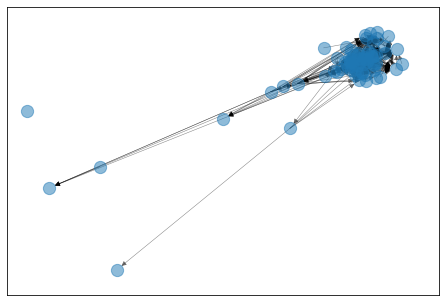

In [53]:
nx.draw(
    G,
    labels=study,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5
)

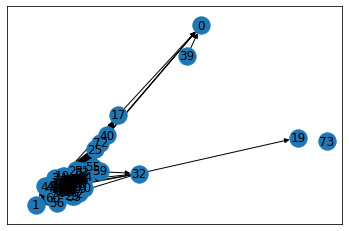

In [56]:
nx.draw_networkx(G, la)

In [ ]:
# Three step forumula for constructing a graph
# (1) read the data, find out how many nodes are there, read out the edge_list, and read out attributes
# (2) initiate a network object (nx.Digraph())
# (3) add nodes (G.add_nodes_from(range(1,74)))
# (4) add edges from edge_list
# (5) adding attributes
# (6) visualization

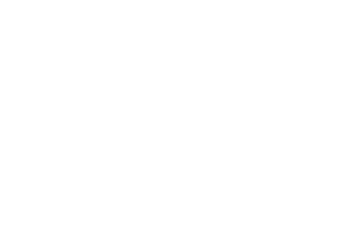

In [46]:
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [47]:
g_sim = nx.generators.directed.random_k_out_graph(75, 2, 0.5)
sim_edge_list = []
year_gap = 2

In [48]:
# degree centrality (IN) for graph g
g_degree = nx.in_degree_centrality(g)

In [49]:
type(g_degree)

dict

In [50]:
for i in year:
    #print("i = ", i)
    for j in range(len(year)):
        if year[j] - i >= year_gap:
            sim_edge_list.append((year[j], i))

NameError: name 'year' is not defined

In [51]:
print(len(sim_edge_list))

0


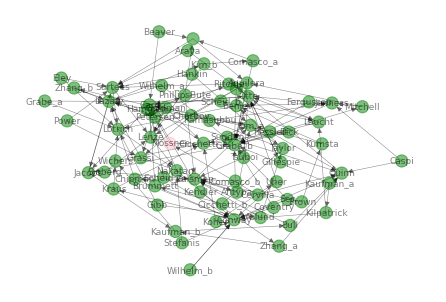

In [52]:
nx.draw(
    g_sim,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

In [53]:
plt.show()

In [54]:
g_degree = nx.in_degree_centrality(g)
print(g_degree)
g_sim_degree = nx.in_degree_centrality(g_sim)

{0: 0.0, 1: 0.04054054054054054, 2: 0.0, 3: 0.013513513513513514, 4: 0.02702702702702703, 5: 0.0945945945945946, 6: 0.06756756756756757, 7: 0.14864864864864866, 8: 0.20270270270270271, 9: 0.13513513513513514, 10: 0.0, 11: 0.0, 12: 0.16216216216216217, 13: 0.0, 14: 0.02702702702702703, 15: 0.02702702702702703, 16: 0.0, 17: 0.0, 18: 0.013513513513513514, 19: 0.0, 20: 0.16216216216216217, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.05405405405405406, 27: 0.14864864864864866, 28: 0.0, 29: 0.013513513513513514, 30: 0.04054054054054054, 31: 0.013513513513513514, 32: 0.04054054054054054, 33: 0.0, 34: 0.08108108108108109, 35: 0.0, 36: 0.22972972972972974, 37: 0.04054054054054054, 38: 0.0, 39: 0.0, 40: 0.05405405405405406, 41: 0.04054054054054054, 42: 0.0, 43: 0.0, 44: 0.10810810810810811, 45: 0.02702702702702703, 46: 0.0, 47: 0.13513513513513514, 48: 0.0, 49: 0.10810810810810811, 50: 0.1891891891891892, 51: 0.04054054054054054, 52: 0.02702702702702703, 53: 0.20270270270270271, 54: 0.0, 

<BarContainer object of 0 artists>

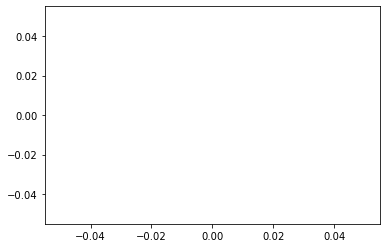

In [55]:
degree_ratio = pd.DataFrame(columns=['paperID','degree_ratio'])
plt.bar(degree_ratio['paperID'], degree_ratio['degree_ratio'], width=0.80, color="b")

In [56]:
last_generation = []
for idx, degree in enumerate(g_degree):
    if g_sim_degree[idx]!=0:
        degree_ratio = degree_ratio.append({'paperID': idx, 'degree_ratio': round(g_degree[idx] / g_sim_degree[idx],3)}, ignore_index=True)
    else:
        last_generation.append(idx)

In [57]:
low_cutoff = 0.1
high_cutoff = 0.9
idx_low = degree_ratio[degree_ratio['degree_ratio'] < low_cutoff].index.tolist()
idx_low = [int(item) for item in idx_low]

In [58]:
idx_high = degree_ratio[degree_ratio['degree_ratio'] > high_cutoff].index.tolist()
idx_high = [int(item) for item in idx_high]

In [59]:
# when you get sim_g working, then 
# g_sim_degree = nx.in_degree_centrality(g_sim)

In [60]:
# if you have both g_degree and g_sim_degree
# you can calculate degree_ratio

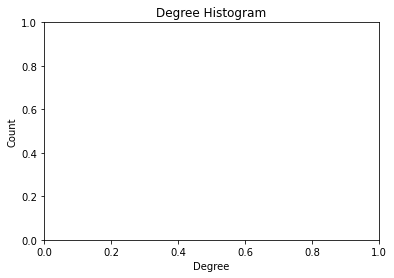

In [61]:
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()